In [1]:
import pandas as pd
import numpy as np
import math
from sympy import primerange, gcd
from sympy.ntheory import prime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numba import njit

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)


Condition 3.1
$$q=a^2+p\cdot b^4$$

In [2]:
@njit
def condition_31_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung q = a^2 + p * b^4 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4 = b ** 4
        rhs = q - p * b4

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)


Condition 3.2
$$p\cdot q=a^2+b^4$$

In [5]:
@njit
def condition_32_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung p * q = a^2 + b^4 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    pq = p * q

    for b in b_values:
        b4 = b ** 4
        rhs = pq - b4

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.3
$$b^4\cdot p\cdot q=a^2+1$$

In [4]:
@njit
def condition_33_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung b^4 * p * q = a^2 + 1 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4_pq = (b ** 4) * p * q
        rhs = b4_pq - 1

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.4
$$p=q\cdot b^4-a^2$$

In [3]:
@njit
def condition_34_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung p = q * b^4 - a^2 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4_q = (b ** 4) * q
        rhs = b4_q - p

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.5
$$q=p\cdot b^4-a^2$$

In [6]:
@njit
def condition_35_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung q = p * b^4 - a^2 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4_p = (b ** 4) * p
        rhs = b4_p - q

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.6
$$p\cdot q=b^4-a^2$$

In [8]:
@njit
def condition_36_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung p * q = b^4 - a^2 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    pq = p * q  # p * q nur einmal berechnen

    for b in b_values:
        b4 = b ** 4  # b^4 nur einmal berechnen
        rhs = b4 - pq  # a^2 = b^4 - p * q

        if rhs >= 0:
            a = int(np.sqrt(rhs))  # Ganzzahlige Wurzel berechnen
            if a * a == rhs:  # Falls exakte Quadratzahl
                return (1, a, b)
    return (0, np.nan, np.nan)

Create a DataFrame with pairs of odd primes, where each row represents a unique pair $(𝑝,q)$ with $𝑝<𝑞$.

In [9]:
primes = primerange(3, 7000) #6000
prime_list=list(primes)
#prime_list.reverse()
l = len(prime_list)

p_values = []
q_values = []
for i in range(len(prime_list)):
    for j in range(i + 1, l):
        p_values.append(prime_list[i])
        q_values.append(prime_list[j])

df_primes = pd.DataFrame({"p": p_values, "q": q_values}, dtype=np.int32)

In [10]:
b_max = 200
b_values = np.arange(1, b_max + 1, dtype=np.int64)  # 1, 2, 3, ..., 200

In [ ]:
df_primes[['condition_31', 'condition_31_a', 'condition_31_b']] = df_primes.apply(lambda row: pd.Series(condition_31_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_31'] = df_primes['condition_31'].astype(np.int8)
df_primes[['condition_31_a', 'condition_31_b']] = df_primes[['condition_31_a', 'condition_31_b']].astype(pd.Int64Dtype())

In [12]:
df_primes[['condition_32', 'condition_32_a', 'condition_32_b']] = df_primes.apply(lambda row: pd.Series(condition_32_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_32'] = df_primes['condition_32'].astype(np.int8)
df_primes[['condition_32_a', 'condition_32_b']] = df_primes[['condition_32_a', 'condition_32_b']].astype(pd.Int64Dtype())

In [13]:
df_primes[['condition_33', 'condition_33_a', 'condition_33_b']] = df_primes.apply(lambda row: pd.Series(condition_33_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_33'] = df_primes['condition_33'].astype(np.int8)
df_primes[['condition_33_a', 'condition_33_b']] = df_primes[['condition_33_a', 'condition_33_b']].astype(pd.Int64Dtype())

In [14]:
df_primes[['condition_34', 'condition_34_a', 'condition_34_b']] = df_primes.apply(lambda row: pd.Series(condition_34_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_34'] = df_primes['condition_34'].astype(np.int8)
df_primes[['condition_34_a', 'condition_34_b']] = df_primes[['condition_34_a', 'condition_34_b']].astype(pd.Int64Dtype())


In [15]:
df_primes[['condition_35', 'condition_35_a', 'condition_35_b']] = df_primes.apply(lambda row: pd.Series(condition_35_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_35'] = df_primes['condition_35'].astype(np.int8)
df_primes[['condition_35_a', 'condition_35_b']] = df_primes[['condition_35_a', 'condition_35_b']].astype(pd.Int64Dtype())

In [16]:
df_primes[['condition_36', 'condition_36_a', 'condition_36_b']] = df_primes.apply(lambda row: pd.Series(condition_36_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_36'] = df_primes['condition_36'].astype(np.int8)
df_primes[['condition_36_a', 'condition_36_b']] = df_primes[['condition_36_a', 'condition_36_b']].astype(pd.Int64Dtype())

Print first solutions satisfying condition 3.3 with $b>1$

In [20]:
df_solutions = df_primes.dropna(subset=['condition_33_a', 'condition_33_b'])
df_solutions = df_solutions[df_solutions['condition_33_b'] > 1][['p', 'q', 'condition_33_a', 'condition_33_b']]
print(df_solutions.head(10))

         p     q  condition_33_a  condition_33_b
962      5   337           34522              29
3994    13  2857            4818               5
4516    17   193            1432               5
4595    17   677            2682               5
7292    29   853            3932               5
9200    37  1789            6432               5
17123   73  1609            8568               5
24790  113   257           28800              13
25178  113  3109           14818               5
43149  233  2557          223070              17


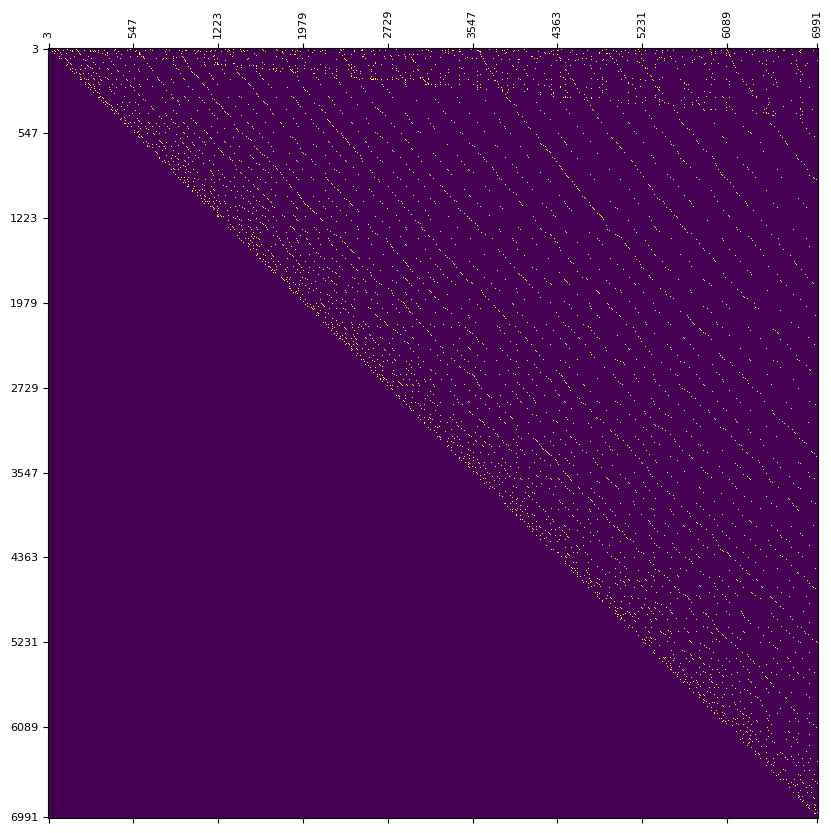

In [21]:
df_condition_met = df_primes[df_primes['condition_31'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()

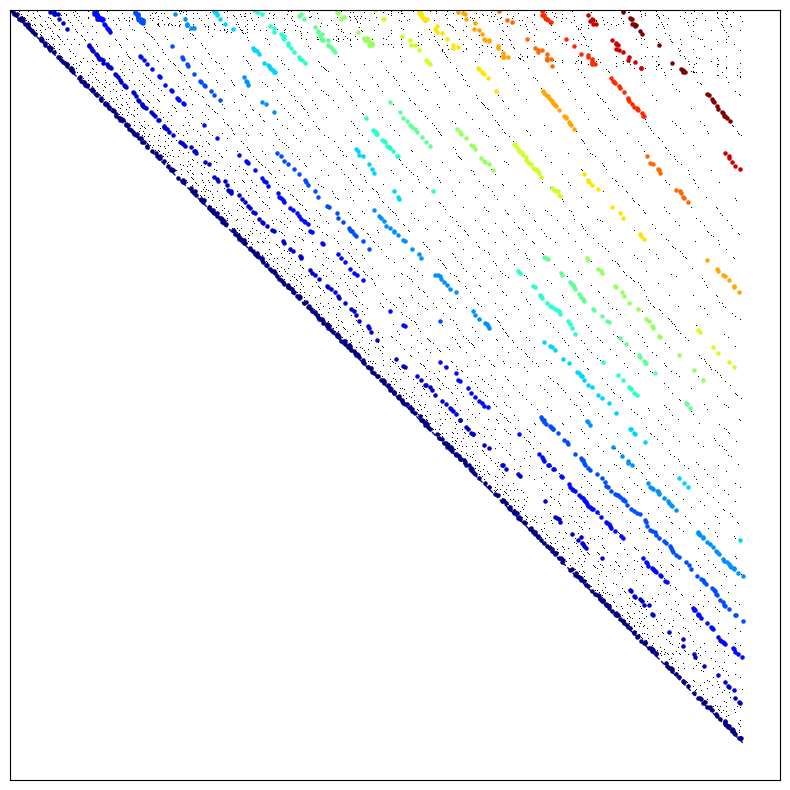

[(0, 2), (2, 3), (4, 5), (4, 8), (6, 7), (9, 13), (10, 11), (10, 14), (12, 13), (12, 15)]


In [27]:
def extract_and_plot_lines(matrix, shift_values, threshold=3):
    """
    Extrahiert die Punktlisten für jede verschobene Linie y = x + shift und plottet sie.
    
    :param matrix: Die ursprüngliche Binärmatrix mit den Punkten.
    :param shift_values: Liste der Verschiebungswerte für die y=x Geraden.
    :param threshold: Maximaler Abstand, um Punkte als zur Linie zugehörig zu betrachten.
    :return: Dictionary mit shift-Werten als Keys und zugehörigen Punkten als Listen von (x, y)-Tupeln.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(matrix, interpolation='nearest', cmap="Greys")

    # Extrahiere die Koordinaten der gesetzten Punkte und filtere nur obere Matrixhälfte (y <= x)
    points = np.column_stack(np.where(matrix == 1))
    points = points[points[:, 0] <= points[:, 1]]  # Nur obere Dreiecksmatrix

    # Dictionary zur Speicherung der Linienpunkte
    line_points_dict = {}

    # Farben für die Linien
    colors = plt.cm.jet(np.linspace(0, 1, len(shift_values)))

    for shift, color in zip(shift_values, colors):
        # Berechne den Abstand jedes Punktes zur Linie y = x + shift
        distances = np.abs(points[:, 0] - points[:, 1] + shift) / np.sqrt(2)

        # Wähle Punkte, die nahe genug an der verschobenen Linie liegen
        close_points = points[distances < threshold]

        # Speichere die Punkte für diese Linie
        line_points_dict[shift] = [tuple(point) for point in close_points]

        # Plotte diese Punkte in der Farbe der verschobenen Linie
        ax.scatter(close_points[:, 1], close_points[:, 0], color=color, s=5)

        # Zeichne die verschobene Gerade nur in der oberen Hälfte
        x_vals = np.linspace(0, matrix.shape[1], 100)
        y_vals = x_vals + shift
        valid_mask = y_vals <= x_vals  # Nur Werte in der oberen Hälfte
        ax.plot(x_vals[valid_mask], y_vals[valid_mask], color=color, linestyle='dashed', linewidth=1)

    # Achsenbeschriftungen entfernen
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()

    return line_points_dict

# Liste der Verschiebungen für die Geraden (z.B. von -50 bis +50 in 10er-Schritten)
shift_values = np.arange(0, 800, 50)

# Linien extrahieren und gleichzeitig plotten
line_points = extract_and_plot_lines(matrix, shift_values)

# Zeige die extrahierten Punktlisten an
first_key = next(iter(line_points))
first_10_values = line_points[first_key][:10]
print(first_10_values)


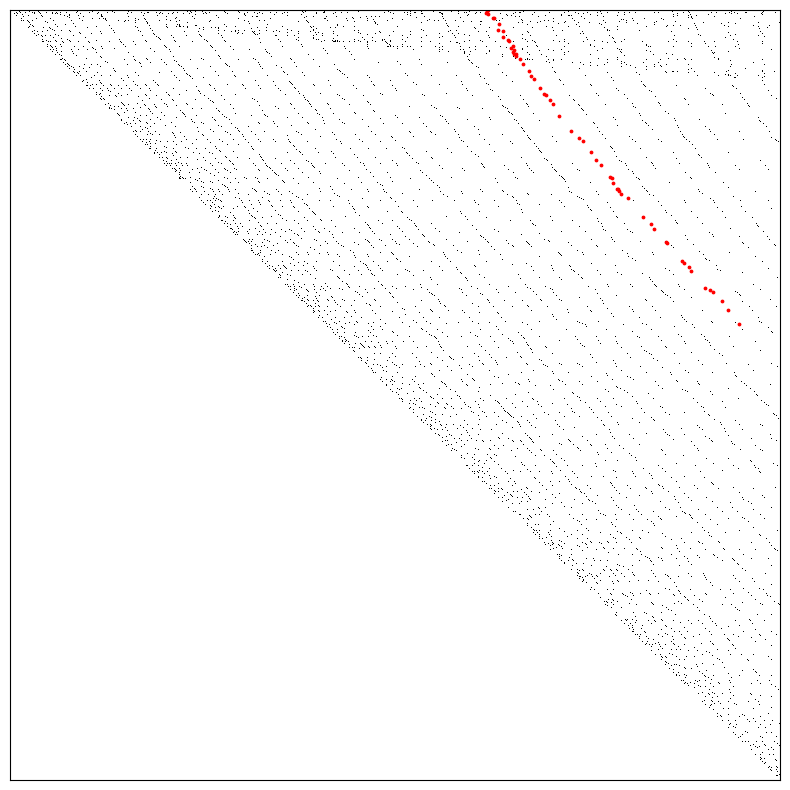

((2400, -1200),
 [(0, 558),
  (1, 556),
  (3, 555),
  (4, 558),
  (9, 564),
  (9, 565),
  (16, 570),
  (23, 569),
  (24, 575),
  (31, 575)])

In [28]:
def extract_and_plot_custom_circular_arc(matrix, x0, y0, fixed_radius, threshold=3):
    """
    Markiert Punkte, die am nächsten zum Kreis mit einem festen Mittelpunkt (x0, y0) und einem festen Radius liegen.

    :param matrix: Die ursprüngliche Binärmatrix mit den Punkten.
    :param x0: Vorgegebener x-Wert für den Mittelpunkt.
    :param y0: Vorgegebener y-Wert für den Mittelpunkt.
    :param fixed_radius: Fester Radius des Kreises.
    :param threshold: Maximaler Abstand, um Punkte als zum Kreisbogen zugehörig zu betrachten.
    :return: Liste der Punkte, die dem Kreisbogen am nächsten liegen, und den verwendeten Mittelpunkt.
    """
    fixed_center = (x0, y0)  # Vorgegebener Mittelpunkt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(matrix, interpolation='nearest', cmap="Greys")

    # Extrahiere die Koordinaten der gesetzten Punkte
    points = np.column_stack(np.where(matrix == 1))

    # Berechne den Abstand jedes Punktes zum Kreis
    distances = np.abs(np.sqrt((points[:, 1] - fixed_center[0]) ** 2 + (points[:, 0] - fixed_center[1]) ** 2) - fixed_radius)

    # Wähle Punkte, die nahe genug am Kreisbogen liegen und innerhalb der Matrix bleiben
    close_points = points[(distances < threshold) &
                          (points[:, 0] >= 0) & (points[:, 0] < matrix.shape[0]) &
                          (points[:, 1] >= 0) & (points[:, 1] < matrix.shape[1])]

    # Plotte diese Punkte in Farbe
    ax.scatter(close_points[:, 1], close_points[:, 0], color="red", s=3)

    # Zeichne den Kreisbogen
    theta = np.linspace(-np.pi / 2, np.pi / 2, 100)  # Nur obere Hälfte des Kreises
    x_arc = fixed_center[0] + fixed_radius * np.cos(theta)
    y_arc = fixed_center[1] + fixed_radius * np.sin(theta)

    # Nur Punkte innerhalb der Matrix plotten
    mask = (x_arc >= 0) & (x_arc < matrix.shape[1]) & (y_arc >= 0) & (y_arc < matrix.shape[0])
    ax.plot(x_arc[mask], y_arc[mask], color="red", linestyle='dashed', linewidth=0.5)

    # Achsenbeschriftungen entfernen
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

    return [tuple(point) for point in close_points], fixed_center

# Setze die gewünschten Werte für den Mittelpunkt und den Radius
x0 = 2400  # Beispielwert für den Mittelpunkt x0
y0 = -1200  # Beispielwert für den Mittelpunkt y0
fixed_radius = 2200  # Beispielradius

# Extrahiere und plotte den Kreisbogen mit den vorgegebenen Werten
arc_points_custom, computed_center_custom = extract_and_plot_custom_circular_arc(matrix, x0, y0, fixed_radius)

# Zeige die berechneten Werte für den Mittelpunkt und die Liste der gefärbten Punkte
computed_center_custom, arc_points_custom[:10]


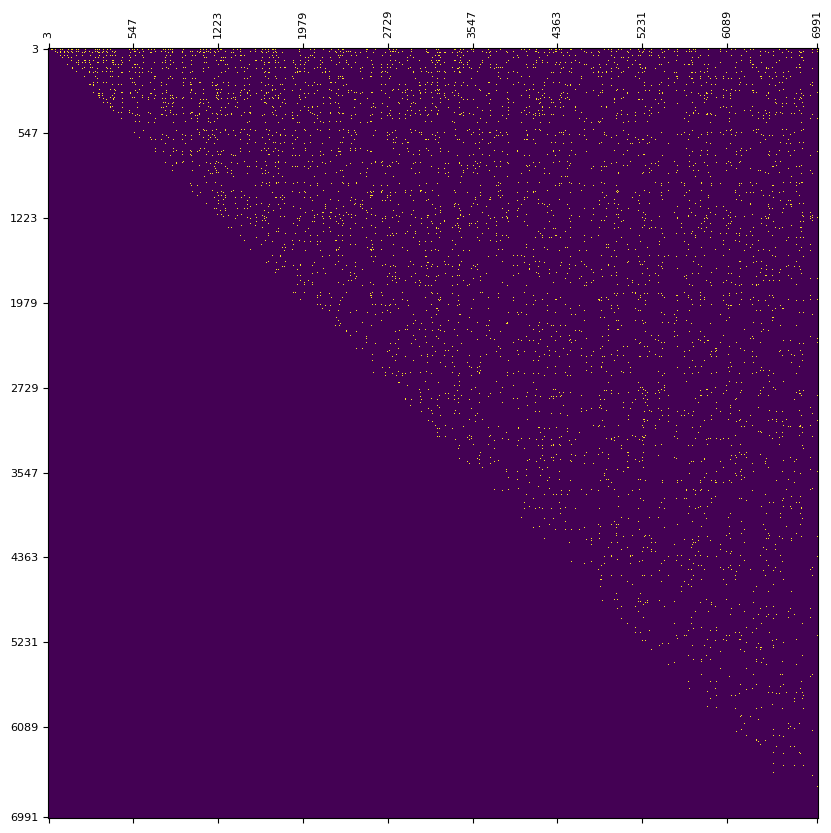

In [29]:
df_condition_met = df_primes[df_primes['condition_32'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()

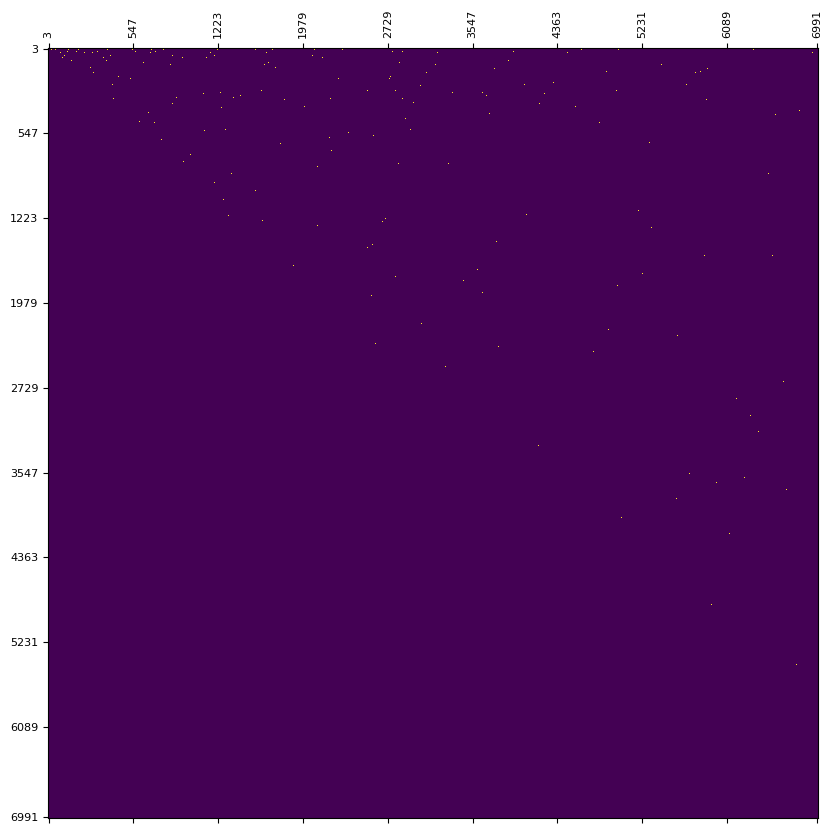

In [30]:
df_condition_met = df_primes[df_primes['condition_33'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()

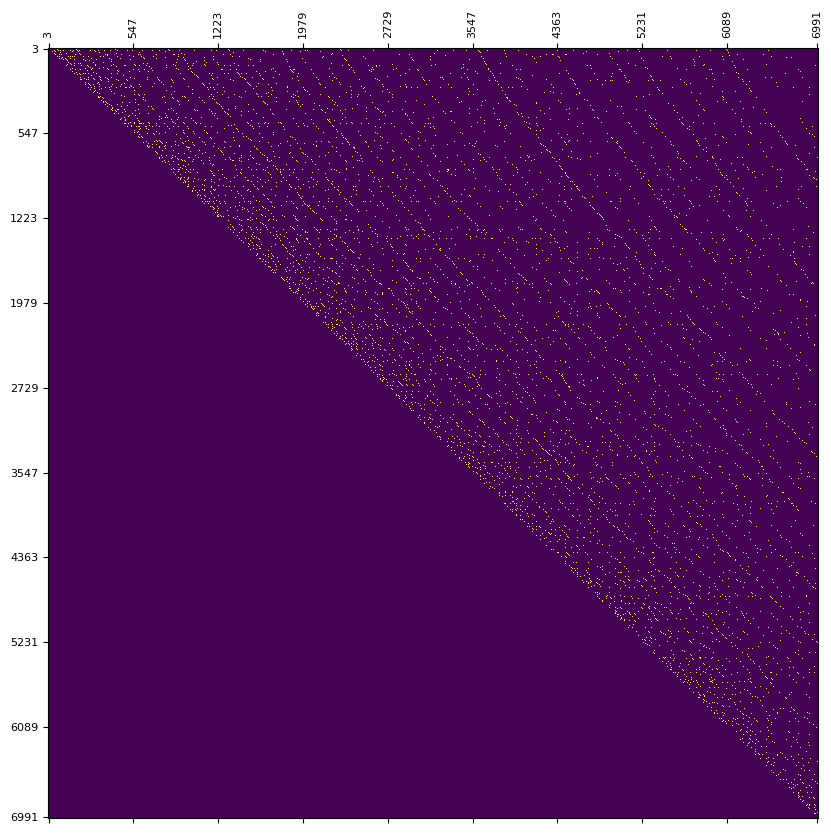

In [31]:
df_condition_met = df_primes[df_primes['condition_34'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()

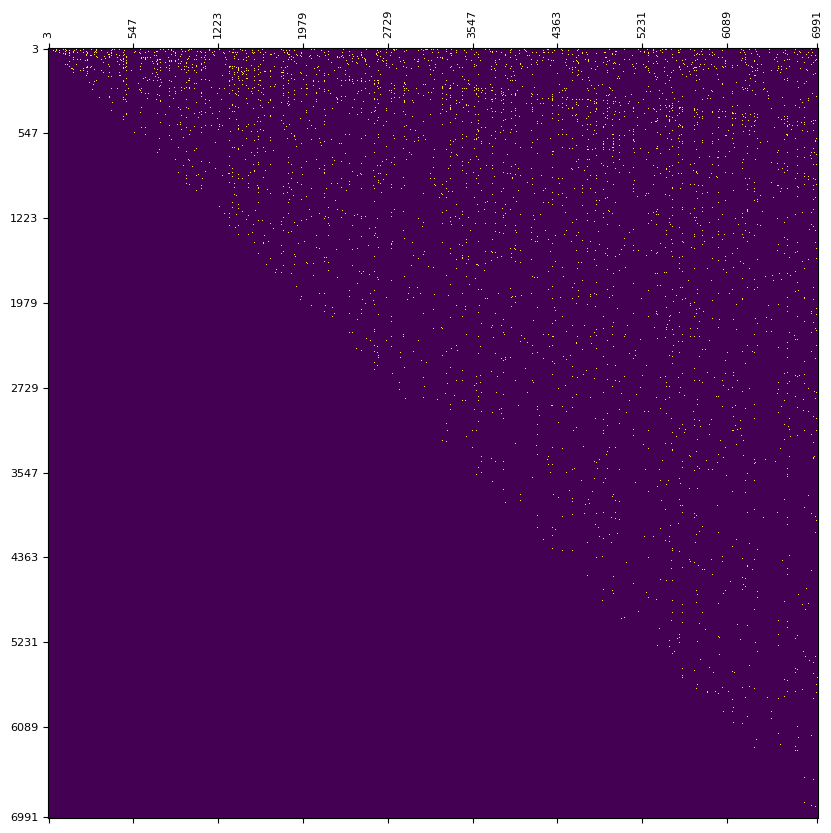

In [32]:
df_condition_met = df_primes[df_primes['condition_35'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()

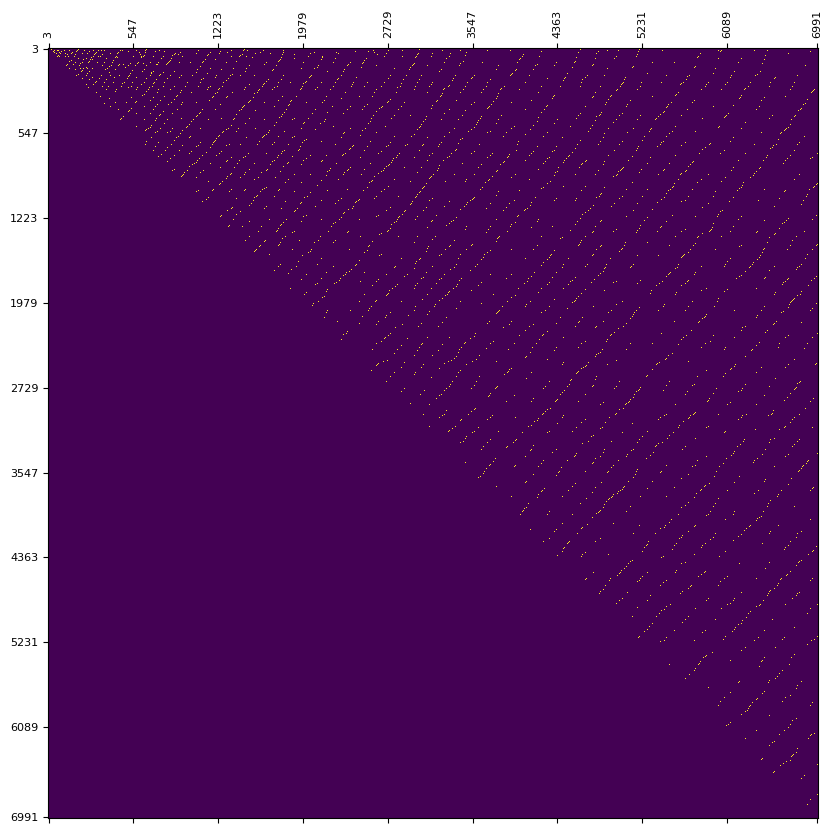

In [33]:
df_condition_met = df_primes[df_primes['condition_36'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()